In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Data Cleansing

In [188]:
#import data froom csv file and using encode in latin because there are some data in latin 
data = pd.read_csv('OnlineRetail.csv', encoding = 'latin1')

In [189]:
#print firist fiive rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [190]:
#print columns and rows
data.shape

(499428, 8)

In [191]:
#print columns names
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [192]:
#Drop Description column because dosenot need for analyze
data = data.drop(['Description'] , axis = 1)

In [193]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [194]:
#Rename the column name
data = data.rename(columns = {'StockCode' : 'SKU'})

In [195]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [196]:
data.dtypes

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [197]:
#Changing InvoiceDate column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [198]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [199]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [200]:
#Seperate the InvoiceDate column
data['Date']= data['InvoiceDate'].apply(lambda x: str(x).split(" "))
                                                

In [201]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"


In [202]:
#Create the two columns for date and hour
data[['date','hour']] = pd.DataFrame(data['Date'].tolist(),index = data.index)

In [203]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [204]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date                   object
hour                   object
dtype: object

In [205]:
#change the data type for date column to datetime
data['date'] = pd.to_datetime(data['date'])

In [206]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
dtype: object

In [207]:
#create a dataframe to store all the null values for all the columns
pd.DataFrame(data.isnull().sum(), columns = ['Null Values'])

,Null Values
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,119449
Country,0
Date,0
date,0
hour,0


In [208]:
#Convert null values into percentages
pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2), columns = ['Null Values%'])

,Null Values%
InvoiceNo,0.00
SKU,0.00
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,23.92
Country,0.00
Date,0.00
date,0.00
hour,0.00


In [209]:
#Drop all the numm values from CustomerID column
data = data.dropna(subset = ['CustomerID'])

In [210]:
data.shape

(379979, 10)

In [211]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [212]:
#Creating new column for Year
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year


In [213]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011


In [214]:
#Creating new column for Month, Day
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day

In [215]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4


In [216]:
data = data.dropna(subset = ['InvoiceDate'])
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499423,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,"[2011-12-09, 12:50:00]",2011-12-09,12:50:00,2011,12,9
499424,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,"[2011-12-09, 12:50:00]",2011-12-09,12:50:00,2011,12,9
499425,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,"[2011-12-09, 12:50:00]",2011-12-09,12:50:00,2011,12,9
499426,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,"[2011-12-09, 12:50:00]",2011-12-09,12:50:00,2011,12,9


In [217]:
#Finding the lenght of Months
len(data['Month'].unique())

12

In [218]:
len(data['SKU'].unique())

3612

In [219]:
len(data['InvoiceNo'].unique())

20482

# Data Analyze

In [220]:
#Revenue by month
data['Revenue'] = data['UnitPrice']*data['Quantity']

In [221]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,Revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.5


In [111]:
#grouping Month and Revenue columns to see the revenue of each month
data_revenue = data.groupby('Month')['Revenue'].sum().reset_index()

In [112]:
data_revenue

,Month,Revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


In [154]:
data = data.dropna(subset = ['InvoiceDate'])
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,Revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12,New


Text(0.5, 1.0, 'Revenue Per Month')

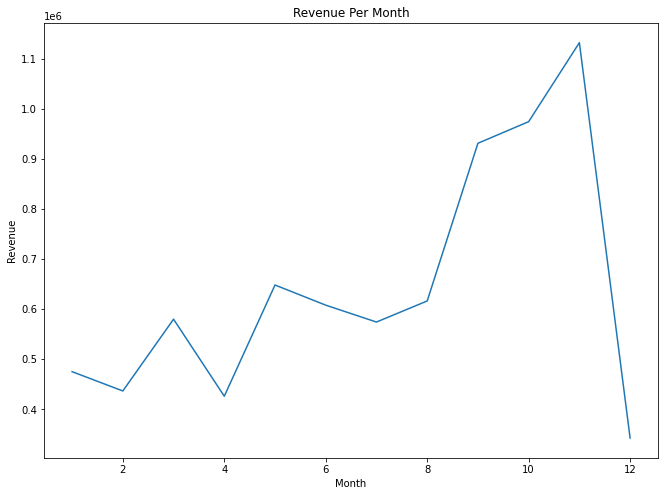

In [113]:
#Creating plot to visualize the data_revenue
fig,axes = plt.subplots(figsize = (11,8))
ax = sns.lineplot(x='Month', y = 'Revenue', data = data_revenue, sort = False)
ax.set_title('Revenue Per Month')

In [114]:
#Monthly Revenue
data_revenue['Monthly GrowthRate'] = data_revenue['Revenue'].pct_change()

In [115]:
data_revenue

,Month,Revenue,Monthly GrowthRate
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [116]:
#Loc the month from Jan to November because December has no data
data_revenue = data_revenue.loc[data_revenue['Month']!=12]

In [117]:
data_revenue

,Month,Revenue,Monthly GrowthRate
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

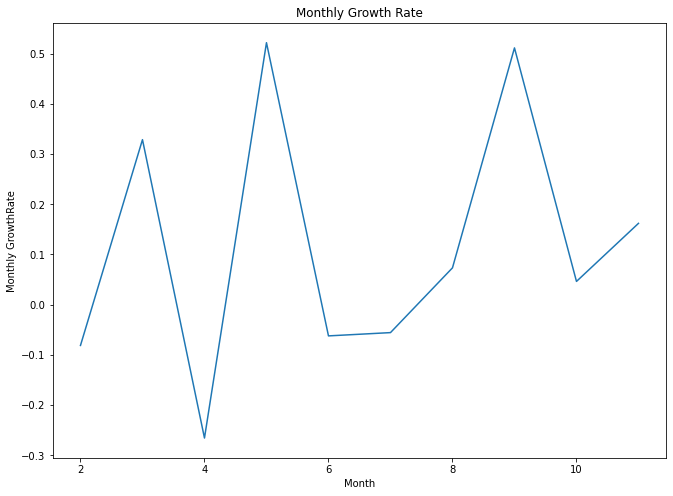

In [118]:
#Plot Monthly Growth rate
fig,axes = plt.subplots(figsize = (11,8))
ax = sns.lineplot(x='Month', y = 'Monthly GrowthRate', data = data_revenue, sort = False)

ax.set_title('Monthly Growth Rate')

In [122]:
#Monthly Active Customers
data_active_customer = data.groupby('Month')['CustomerID'].nunique().reset_index()
data_active_customer

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


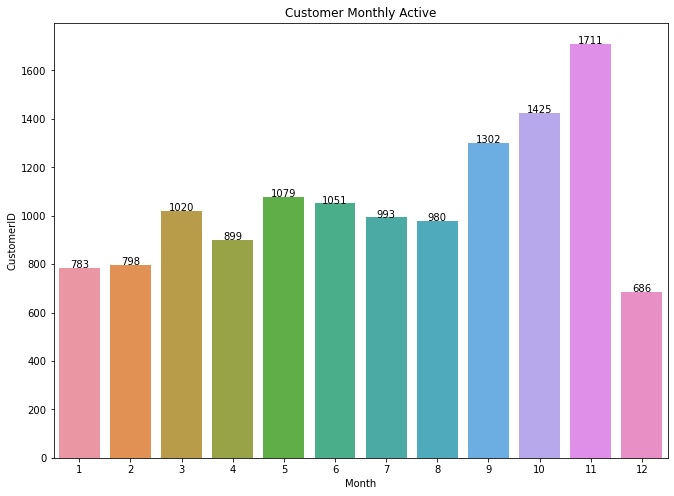

In [127]:
#Creating plot to visualize the Customer Monthly Active
fig,axes = plt.subplots(figsize = (11,8))
ax = sns.barplot(x='Month', y = 'CustomerID', data = data_active_customer)
ax.set_title('Customer Monthly Active')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height + 0.2, ha = 'center', s = '{:.0f}'.format(height))

In [131]:
#Average Revenue
data_avg_revenue = data.groupby('Month')['Revenue'].mean().reset_index()
data_avg_revenue

,Month,Revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


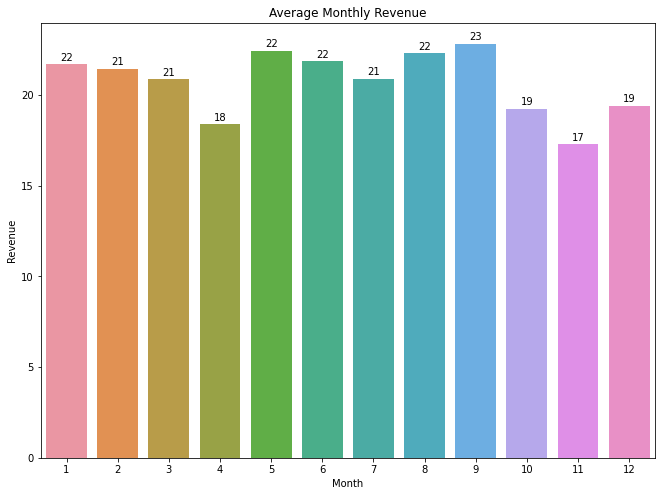

In [132]:
#Plot Average Revenue
fig,axes = plt.subplots(figsize = (11,8))
ax = sns.barplot(x='Month', y = 'Revenue', data = data_avg_revenue)
ax.set_title('Average Monthly Revenue')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height + 0.2, ha = 'center', s = '{:.0f}'.format(height))

In [134]:
#Min Purchase history by customer
data_min_date_buy = data.groupby('CustomerID').date.min().reset_index()
data_min_date_buy

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [135]:
#Create an column MinPurchaseDate
data_min_date_buy.columns = ['CustomerID', 'MinPurchaseDate']

In [140]:
#Create an column MinPurchaseMonth
data_min_date_buy['MinPurchaseMonth'] = data_min_date_buy['MinPurchaseDate'].map(lambda date:date.month)
data_min_date_buy

,CustomerID,MinPurchaseDate,MinPurchaseMonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [141]:
#Join dataframe MinPurchaseDate and MinPurchaseMonth in to dataset
data = pd.merge(data, data_min_date_buy, on = 'CustomerID')

In [144]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,Revenue,MinPurchaseDate,MinPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.5,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.5,2011-01-04,1


In [149]:
#Finding new or old customers
data['UserType'] = 'New'
data.loc[data['Month']>data['MinPurchaseMonth'], 'UserType'] = 'Existing'
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,Revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12,New


In [150]:
#Finding the revenue by usertype either New or Existing
data_usertype_revenue = data.groupby(['Month', 'UserType'])['Revenue'].sum().reset_index()
data_usertype_revenue

,Month,UserType,Revenue
0,1,New,475074.380
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


Text(0.5, 1.0, 'Revenue by User Type')

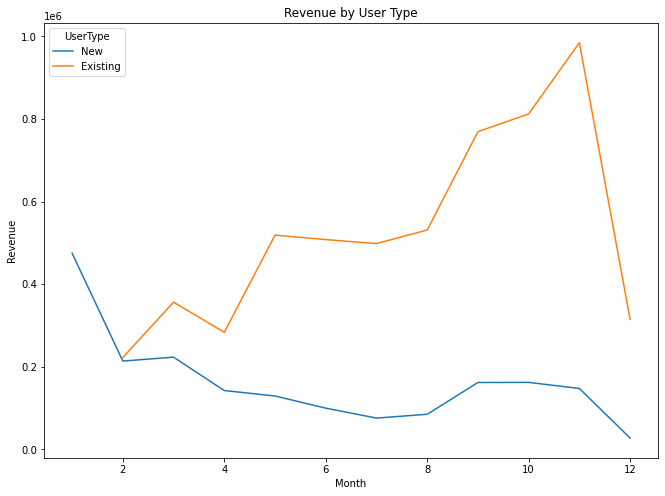

In [153]:
#Plot UserType Revenue
fig,axes = plt.subplots(figsize = (11,8))
ax = sns.lineplot(data = data_usertype_revenue, x='Month', y = 'Revenue', hue = 'UserType')
ax.set_title('Revenue by User Type')
